# Harnessing Machine Learning for interpersonal physical alignment

In [1]:
#libraries
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

#preproccesing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
import xgboost
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# visulization
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

# Loading the data:

In [2]:
columns = ['l_Frame ID', 'l_Hand Type',
       'l_# hands', 'l_Position X', 'l_Position Y', 'l_Position Z', 'l_Velocity X',
       'l_Velocity Y', 'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw', 'l_Wrist Pos X',
       'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X', 'l_Elbow Pos Y',
       'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle', 'l_Pinch Strength',
       'type',
       'r_Frame ID', 'r_Hand Type',
       'r_# hands', 'r_Position X', 'r_Position Y', 'r_Position Z', 'r_Velocity X',
       'r_Velocity Y', 'r_Velocity Z', 'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X',
       'r_Wrist Pos Y', 'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y',
       'r_Elbow Pos Z', 'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength',
       'r_type']

In [3]:
def load(name,HR):   
    h = []
    j = 0
    for i in name:
        df = pd.read_csv(i)        
        if(name[j][-5:] == 'n.csv'):
            df["type"] = 'Spontan'
        if(name[j][-5:] == 'c.csv'):
            df["type"] = 'Sync'
        if(name[j][-5:] == 'e.csv'):  
            df["type"] = 'Alone'
            HR["type"] = 'Alone'
            df = df[df[' Hand Type'] != 'right']
            df = df.set_index(['Time'])
            HR = HR.set_index(['Time'])
            df = df.reset_index(drop=True)
            HR = HR.reset_index(drop=True)             
            f = pd.concat([df, HR], axis = 1)                
            f.columns = columns
            
        if (name[j][-5:] != 'e.csv'):
            df_l = df[df[' Hand Type']=='left']
            df_r = df[df[' Hand Type']=='right']
            df_l = df_l.set_index(['Time'])
            df_r = df_r.set_index(['Time'])            
            f = pd.concat([df_l,df_r], axis = 1)
            f.columns = columns

        j = j + 1
        f = f.iloc[700:]
        h.append(f)    
    return h

### Load right hand set

In [4]:
right_alone_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles/HandRight.csv'
right_alone_df = pd.read_csv(right_alone_path)
right_alone_df

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.671670,226.2064,20.264700,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.241190,222.9389,20.117810,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.724610,220.9709,19.949720,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.090160,219.7124,19.676790,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.460170,219.3652,19.131280,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,208.1942,24687,right,1,-15.404800,208.0276,9.980799,167.86240,510.085200,-105.529500,...,-0.282299,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.503490,0.0
4808,208.2108,24689,right,1,-12.678650,218.1196,9.314082,145.00970,562.359400,-20.707010,...,-0.263492,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.403687,0.0
4809,208.2276,24691,right,1,-9.643562,228.2807,9.722980,180.42160,591.901900,28.880570,...,-0.234336,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.310940,0.0
4810,208.2443,24692,right,1,-7.980715,233.5056,10.419080,192.45930,604.734400,80.566980,...,-0.222084,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.286526,0.0


In [5]:
right_alone_df.columns

Index(['Time', ' Frame ID', ' Hand Type', ' # hands', ' Position X',
       ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

In [6]:
right_alone_df.groupby([' Hand Type']).count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
left,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
right,4738,4738,4738,4738,4738,4738,4738,4738,4738,4738,...,4738,4354,4354,4354,4354,4354,4354,4738,4738,4738


In [7]:
right_alone_df = right_alone_df[right_alone_df[' Hand Type'] != 'left']
right_alone_df.groupby([' Hand Type']).count()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
Hand Type,,,,,,,,,,,,,,,,,,,,,
right,4738,4738,4738,4738,4738,4738,4738,4738,4738,4738,...,4738,4354,4354,4354,4354,4354,4354,4738,4738,4738


In [8]:
right_alone_df.columns

Index(['Time', ' Frame ID', ' Hand Type', ' # hands', ' Position X',
       ' Position Y', ' Position Z', ' Velocity X', ' Velocity Y',
       ' Velocity Z', ' Pitch', ' Roll', ' Yaw', ' Wrist Pos X',
       ' Wrist Pos Y', ' Wrist Pos Z', ' Elbow pos X', ' Elbow Pos Y',
       ' Elbow Pos Z', ' Grab Strenth', ' Grab Angle', ' Pinch Strength'],
      dtype='object')

### Load test

In [9]:
ItielLab_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Validation\Itiel Lab/'
MorSHerman_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Validation\Mor SHerman/'
OdedMedina_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Validation\Oded Medina/'
ItielLab = [ItielLab_path + i for i in os.listdir(ItielLab_path)]
MorSHerman = [MorSHerman_path + i for i in os.listdir(MorSHerman_path)]
OdedMedina = [OdedMedina_path + i for i in os.listdir(OdedMedina_path)]

In [10]:
Itiel = load(ItielLab,right_alone_df)
Mor = load(MorSHerman,right_alone_df)
Oded = load(OdedMedina,right_alone_df)

In [11]:
ItielResult = pd.concat(Itiel)
MorResult = pd.concat(Mor)
OdedResult = pd.concat(Oded)

In [12]:
test_csv = [ItielResult,MorResult,OdedResult]
test_df = pd.concat(test_csv)
test_df

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
783.8766,91656.0,left,2.0,-148.37290,201.5105,60.00438,-17.26907,-15.27103,32.07042,1.496495,...,149.0821,83.32772,33.62519,146.2059,-21.17127,257.3058,0.0,0.381800,0.0,Spontan
783.8931,91658.0,left,2.0,-148.48320,201.3344,60.68468,13.94115,-24.90545,40.09111,1.499708,...,150.5715,85.00555,33.45618,146.2230,-22.93286,255.5082,0.0,0.374947,0.0,Spontan
783.9097,91660.0,left,2.0,-148.08100,201.1309,61.29757,24.64978,-21.55522,34.20727,1.503604,...,152.1821,86.88781,33.26069,154.5666,-23.92799,253.9572,0.0,0.339523,0.0,Spontan
783.9263,91662.0,left,2.0,-147.19610,200.2499,61.93992,54.58652,-53.79900,43.02767,1.511389,...,153.6517,88.22997,32.91113,165.8814,-26.24262,251.4375,0.0,0.292715,0.0,Spontan
783.9428,91664.0,left,2.0,-146.27030,198.9451,62.54176,56.74417,-83.57710,30.72928,1.504369,...,154.9320,88.93008,32.50669,174.1423,-31.10865,247.5492,0.0,0.263266,0.0,Spontan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998.7513,66216.0,left,2.0,-98.32814,314.4973,75.12682,41.16818,115.85070,27.61459,1.611798,...,156.7337,255.09190,101.90250,341.0338,65.01146,125.5006,0.0,0.000000,0.0,Sync
998.7836,66219.0,left,2.0,-97.31071,319.5955,76.22157,31.36302,143.96100,30.50205,1.616390,...,157.5847,259.11920,102.11500,336.8353,64.01215,123.4790,0.0,0.000000,0.0,Sync
998.8158,66221.0,left,2.0,-96.74767,323.8981,76.98316,27.14988,185.62180,33.74187,1.619489,...,159.1932,263.27260,102.53110,332.9102,62.99343,121.6264,0.0,0.000000,0.0,Sync
998.8495,66224.0,left,2.0,-95.67720,329.8123,78.13316,47.37696,118.31670,24.15247,1.618042,...,163.0329,269.72170,103.07490,340.7914,72.96347,121.5707,0.0,0.024162,0.0,Sync


In [13]:
test_df.groupby(['type']).count()

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
type,,,,,,,,,,,,,,,,,,,,,
Alone,9149,9149,9149,9149,9149,9149,9149,9149,9149,9149,...,8858,8858,8858,8858,8858,8858,9149,9149,9149,9149
Spontan,9138,9138,9138,9138,9138,9138,9138,9138,9138,9138,...,9138,9138,9138,9138,9138,9138,9138,9138,9138,9138
Sync,8935,8935,8935,8935,8935,8935,8935,8935,8935,8935,...,8916,8916,8916,8916,8916,8916,8916,8916,8916,8916


In [14]:
test_df.columns

Index(['l_Frame ID', 'l_Hand Type', 'l_# hands', 'l_Position X',
       'l_Position Y', 'l_Position Z', 'l_Velocity X', 'l_Velocity Y',
       'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw', 'l_Wrist Pos X',
       'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X', 'l_Elbow Pos Y',
       'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle', 'l_Pinch Strength',
       'type', 'r_Frame ID', 'r_Hand Type', 'r_# hands', 'r_Position X',
       'r_Position Y', 'r_Position Z', 'r_Velocity X', 'r_Velocity Y',
       'r_Velocity Z', 'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X',
       'r_Wrist Pos Y', 'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y',
       'r_Elbow Pos Z', 'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength',
       'r_type'],
      dtype='object')

In [15]:
test_df.drop(['l_Frame ID','l_Hand Type','l_# hands','r_type','r_Frame ID', 'r_Hand Type', 'r_# hands'],axis = 1,inplace = True)

In [16]:
test_df.columns

Index(['l_Position X', 'l_Position Y', 'l_Position Z', 'l_Velocity X',
       'l_Velocity Y', 'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw',
       'l_Wrist Pos X', 'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X',
       'l_Elbow Pos Y', 'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle',
       'l_Pinch Strength', 'type', 'r_Position X', 'r_Position Y',
       'r_Position Z', 'r_Velocity X', 'r_Velocity Y', 'r_Velocity Z',
       'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X', 'r_Wrist Pos Y',
       'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y', 'r_Elbow Pos Z',
       'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength'],
      dtype='object')

In [17]:
test_df

,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,l_Roll,l_Yaw,l_Wrist Pos X,...,r_Yaw,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength
783.8766,-148.37290,201.5105,60.00438,-17.26907,-15.27103,32.07042,1.496495,0.552045,1.525121,-208.9962,...,-0.275585,149.0821,83.32772,33.62519,146.2059,-21.17127,257.3058,0.0,0.381800,0.0
783.8931,-148.48320,201.3344,60.68468,13.94115,-24.90545,40.09111,1.499708,0.556520,1.526571,-209.1183,...,-0.282398,150.5715,85.00555,33.45618,146.2230,-22.93286,255.5082,0.0,0.374947,0.0
783.9097,-148.08100,201.1309,61.29757,24.64978,-21.55522,34.20727,1.503604,0.551738,1.529353,-209.0417,...,-0.285038,152.1821,86.88781,33.26069,154.5666,-23.92799,253.9572,0.0,0.339523,0.0
783.9263,-147.19610,200.2499,61.93992,54.58652,-53.79900,43.02767,1.511389,0.551986,1.534157,-208.2689,...,-0.282949,153.6517,88.22997,32.91113,165.8814,-26.24262,251.4375,0.0,0.292715,0.0
783.9428,-146.27030,198.9451,62.54176,56.74417,-83.57710,30.72928,1.504369,0.534547,1.531448,-207.8819,...,-0.278521,154.9320,88.93008,32.50669,174.1423,-31.10865,247.5492,0.0,0.263266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998.7513,-98.32814,314.4973,75.12682,41.16818,115.85070,27.61459,1.611798,0.871997,1.619884,-147.8138,...,-1.447439,156.7337,255.09190,101.90250,341.0338,65.01146,125.5006,0.0,0.000000,0.0
998.7836,-97.31071,319.5955,76.22157,31.36302,143.96100,30.50205,1.616390,0.878401,1.626107,-146.5180,...,-1.447845,157.5847,259.11920,102.11500,336.8353,64.01215,123.4790,0.0,0.000000,0.0
998.8158,-96.74767,323.8981,76.98316,27.14988,185.62180,33.74187,1.619489,0.895829,1.632054,-145.1963,...,-1.436827,159.1932,263.27260,102.53110,332.9102,62.99343,121.6264,0.0,0.000000,0.0
998.8495,-95.67720,329.8123,78.13316,47.37696,118.31670,24.15247,1.618042,0.904771,1.631368,-143.7923,...,-1.418975,163.0329,269.72170,103.07490,340.7914,72.96347,121.5707,0.0,0.024162,0.0


In [18]:
test_df['type'].value_counts()

Alone      9149
Spontan    9138
Sync       8935
Name: type, dtype: int64

### Load train

In [19]:
EvyatarCohen_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Evyatar Cohen/'
NofarSocial_Nuero_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Nofar Social_Nuero/'
OriyaSocial_Nuero_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Oriya Social_Nuero/'
OryaKalmanovitz_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Orya Kalmanovitz/'
RevitalMarbel_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Revital Marbel/'
ShaharTerner_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Shahar Terner/'
ShellySocial_Nuero_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Shelly Social_Nuero/'
YaelHagai_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Yael Hagai/'
YoelRaz_path = r'C:\Users\talia\OneDrive\שולחן העבודה\CS BA\שנה א\Semester B\Data Science Project B\קבצים לעבודת גמר\extraFiles\Training\Yoel Raz/'

In [20]:
EvyatarCohen = [EvyatarCohen_path + i for i in os.listdir(EvyatarCohen_path)]
NofarSocial_Nuero = [NofarSocial_Nuero_path + i for i in os.listdir(NofarSocial_Nuero_path)]
OriyaSocial_Nuero = [OriyaSocial_Nuero_path + i for i in os.listdir(OriyaSocial_Nuero_path)]
OryaKalmanovitz = [OryaKalmanovitz_path + i for i in os.listdir(OryaKalmanovitz_path)]
RevitalMarbel = [RevitalMarbel_path + i for i in os.listdir(RevitalMarbel_path)]
ShaharTerner = [ShaharTerner_path + i for i in os.listdir(ShaharTerner_path)]
ShellySocial_Nuero = [ShellySocial_Nuero_path + i for i in os.listdir(ShellySocial_Nuero_path)]
YaelHagai = [YaelHagai_path + i for i in os.listdir(YaelHagai_path)]
YoelRaz = [YoelRaz_path + i for i in os.listdir(YoelRaz_path)]

In [21]:
Evyatar = load(EvyatarCohen,right_alone_df)
Nofar = load(NofarSocial_Nuero,right_alone_df)
Oriya = load(OriyaSocial_Nuero,right_alone_df)
OryaKa = load(OryaKalmanovitz,right_alone_df)
Revital = load(RevitalMarbel,right_alone_df)
Shahar = load(ShaharTerner,right_alone_df)
Shelly = load(ShellySocial_Nuero,right_alone_df)
Yael = load(YaelHagai,right_alone_df)
Yoel = load(YoelRaz,right_alone_df)

In [22]:
EvyatarResult = pd.concat(Evyatar)
NofarResult = pd.concat(Nofar)
OriyaResult = pd.concat(Oriya)
OryaKaResult = pd.concat(OryaKa)
RevitalResult = pd.concat(Revital)
ShaharResult = pd.concat(Shahar)
ShellyResult = pd.concat(Shelly)
YaelResult = pd.concat(Yael)
YoelResult = pd.concat(Yoel)

In [23]:
train_csv = [EvyatarResult,NofarResult,OriyaResult,OryaKaResult,RevitalResult,ShaharResult,ShellyResult,YaelResult,YoelResult]
train_df = pd.concat(train_csv)
train_df

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
347.5953,129893.0,left,2.0,-90.35130,152.8257,-15.253350,11.48529,-24.32232,-123.79200,0.057997,...,211.2385,154.5470,3.753255,308.8327,-16.433850,157.04660,0.0,0.462682,0.357548,Spontan
347.6119,129895.0,left,2.0,-88.54211,151.8134,-17.573630,150.82950,-45.92197,-143.97270,0.229993,...,211.8405,154.9556,3.755771,309.5113,-13.961560,159.27220,0.0,0.487098,0.366849,Spontan
347.6284,129897.0,left,2.0,-85.44501,150.6912,-19.932280,180.43730,-67.56274,-122.93300,0.342248,...,212.3367,155.3786,3.698633,310.3992,-11.694740,160.95050,0.0,0.508711,0.342098,Spontan
347.6447,129898.0,left,2.0,-84.20158,150.4454,-20.772450,141.99320,-28.06757,-95.94225,0.388592,...,212.4461,155.4613,3.675935,310.8626,-10.689370,161.68240,0.0,0.497236,0.312971,Spontan
347.6613,129900.0,left,2.0,-81.54483,150.7831,-21.980030,149.77240,21.28659,-85.69943,0.371817,...,212.5647,155.4003,3.640275,311.4235,-9.389294,162.79190,0.0,0.478578,0.299432,Spontan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856.1965,67304.0,left,2.0,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,...,129.1261,148.7041,62.824040,300.6781,-33.586720,128.75430,0.0,0.000000,0.000000,Sync
856.2291,67306.0,left,2.0,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,...,129.2868,148.1146,63.112180,285.6505,-53.666400,106.02620,0.0,0.000000,0.000000,Sync
856.2631,67309.0,left,2.0,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,...,131.8590,149.6264,66.098530,283.6185,-58.034910,95.29868,0.0,0.000000,0.000000,Sync
856.2958,67311.0,left,2.0,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,...,134.0416,151.5924,68.176930,288.9688,-54.138200,94.23959,0.0,0.000000,0.000000,Sync


In [26]:
type_ = train_df.groupby('type').count()
type_

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
type,,,,,,,,,,,,,,,,,,,,,
Alone,31363,31363,31363,31363,31363,31363,31363,31363,31363,31363,...,30369,30369,30369,30369,30369,30369,31363,31363,31363,31363
Spontan,31771,31771,31771,31771,31771,31771,31771,31771,31771,31771,...,31602,31602,31602,31602,31602,31602,31602,31602,31602,31602
Sync,31379,31379,31379,31379,31379,31379,31379,31379,31379,31379,...,31364,31364,31364,31364,31364,31364,31364,31364,31364,31364


In [27]:
train_df.columns

Index(['l_Frame ID', 'l_Hand Type', 'l_# hands', 'l_Position X',
       'l_Position Y', 'l_Position Z', 'l_Velocity X', 'l_Velocity Y',
       'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw', 'l_Wrist Pos X',
       'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X', 'l_Elbow Pos Y',
       'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle', 'l_Pinch Strength',
       'type', 'r_Frame ID', 'r_Hand Type', 'r_# hands', 'r_Position X',
       'r_Position Y', 'r_Position Z', 'r_Velocity X', 'r_Velocity Y',
       'r_Velocity Z', 'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X',
       'r_Wrist Pos Y', 'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y',
       'r_Elbow Pos Z', 'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength',
       'r_type'],
      dtype='object')

In [28]:
train_df.drop(['l_Frame ID','l_Hand Type','l_# hands','r_type','r_Frame ID', 'r_Hand Type', 'r_# hands'],axis = 1,inplace = True)

In [29]:
train_df.columns

Index(['l_Position X', 'l_Position Y', 'l_Position Z', 'l_Velocity X',
       'l_Velocity Y', 'l_Velocity Z', 'l_Pitch', 'l_Roll', 'l_Yaw',
       'l_Wrist Pos X', 'l_Wrist Pos Y', 'l_Wrist Pos Z', 'l_Elbow pos X',
       'l_Elbow Pos Y', 'l_Elbow Pos Z', 'l_Grab Strenth', 'l_Grab Angle',
       'l_Pinch Strength', 'type', 'r_Position X', 'r_Position Y',
       'r_Position Z', 'r_Velocity X', 'r_Velocity Y', 'r_Velocity Z',
       'r_Pitch', 'r_Roll', 'r_Yaw', 'r_Wrist Pos X', 'r_Wrist Pos Y',
       'r_Wrist Pos Z', 'r_Elbow pos X', 'r_Elbow Pos Y', 'r_Elbow Pos Z',
       'r_Grab Strenth', 'r_Grab Angle', 'r_Pinch Strength'],
      dtype='object')

In [30]:
train_df

,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,l_Roll,l_Yaw,l_Wrist Pos X,...,r_Yaw,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength
347.5953,-90.35130,152.8257,-15.253350,11.48529,-24.32232,-123.79200,0.057997,-0.288554,1.270159,-157.9376,...,-0.648590,211.2385,154.5470,3.753255,308.8327,-16.433850,157.04660,0.0,0.462682,0.357548
347.6119,-88.54211,151.8134,-17.573630,150.82950,-45.92197,-143.97270,0.229993,-0.261036,1.209123,-155.6624,...,-0.646624,211.8405,154.9556,3.755771,309.5113,-13.961560,159.27220,0.0,0.487098,0.366849
347.6284,-85.44501,150.6912,-19.932280,180.43730,-67.56274,-122.93300,0.342248,-0.254073,1.157800,-151.7288,...,-0.646846,212.3367,155.3786,3.698633,310.3992,-11.694740,160.95050,0.0,0.508711,0.342098
347.6447,-84.20158,150.4454,-20.772450,141.99320,-28.06757,-95.94225,0.388592,-0.263128,1.143781,-150.0312,...,-0.647291,212.4461,155.4613,3.675935,310.8626,-10.689370,161.68240,0.0,0.497236,0.312971
347.6613,-81.54483,150.7831,-21.980030,149.77240,21.28659,-85.69943,0.371817,-0.287843,1.167613,-147.5270,...,-0.650767,212.5647,155.4003,3.640275,311.4235,-9.389294,162.79190,0.0,0.478578,0.299432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856.1965,-77.62601,173.7391,-14.213500,-46.75000,99.50911,71.01207,0.629213,1.887313,0.429763,-107.8500,...,-0.495629,129.1261,148.7041,62.824040,300.6781,-33.586720,128.75430,0.0,0.000000,0.000000
856.2291,-78.43058,176.0170,-12.152660,-33.69026,98.24361,59.77054,0.667618,1.870251,0.434664,-108.0805,...,-0.525644,129.2868,148.1146,63.112180,285.6505,-53.666400,106.02620,0.0,0.000000,0.000000
856.2631,-79.84506,180.2403,-9.015577,-68.45120,136.37580,87.63277,0.725945,1.838532,0.456099,-109.0018,...,-0.574317,131.8590,149.6264,66.098530,283.6185,-58.034910,95.29868,0.0,0.000000,0.000000
856.2958,-81.57359,183.5054,-7.185198,-63.24731,121.75270,62.95970,0.762549,1.824587,0.459446,-109.7250,...,-0.612753,134.0416,151.5924,68.176930,288.9688,-54.138200,94.23959,0.0,0.000000,0.000000


In [31]:
train_df.groupby('type').count()

,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,l_Roll,l_Yaw,l_Wrist Pos X,...,r_Yaw,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength
type,,,,,,,,,,,,,,,,,,,,,
Alone,31363,31363,31363,31363,31363,31363,31363,31363,31363,31363,...,31363,30369,30369,30369,30369,30369,30369,31363,31363,31363
Spontan,31771,31771,31771,31771,31771,31771,31771,31771,31771,31771,...,31602,31602,31602,31602,31602,31602,31602,31602,31602,31602
Sync,31379,31379,31379,31379,31379,31379,31379,31379,31379,31379,...,31364,31364,31364,31364,31364,31364,31364,31364,31364,31364


In [32]:
print("Number of missing values in the test set:",test_df.isnull().any().sum())

Number of missing values in the test set: 37


In [33]:
test_df.dropna(inplace=True, axis=0, how="any")

In [34]:

print("Number of missing values in the train set:",train_df.isnull().any().sum())

Number of missing values in the train set: 37


In [35]:
train_df.dropna(inplace=True, axis=0, how="any")

In [36]:
train_df.groupby('type').count()

,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,l_Roll,l_Yaw,l_Wrist Pos X,...,r_Yaw,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength
type,,,,,,,,,,,,,,,,,,,,,
Alone,30369,30369,30369,30369,30369,30369,30369,30369,30369,30369,...,30369,30369,30369,30369,30369,30369,30369,30369,30369,30369
Spontan,31602,31602,31602,31602,31602,31602,31602,31602,31602,31602,...,31602,31602,31602,31602,31602,31602,31602,31602,31602,31602
Sync,31364,31364,31364,31364,31364,31364,31364,31364,31364,31364,...,31364,31364,31364,31364,31364,31364,31364,31364,31364,31364


In [37]:
train_df['type'].value_counts()

Spontan    31602
Sync       31364
Alone      30369
Name: type, dtype: int64

In [38]:
train_df = train_df.groupby(np.arange(len(train_df.index))//20, axis=0).max()
test_df = test_df.groupby(np.arange(len(test_df.index))//20, axis=0).max()

# Visualization

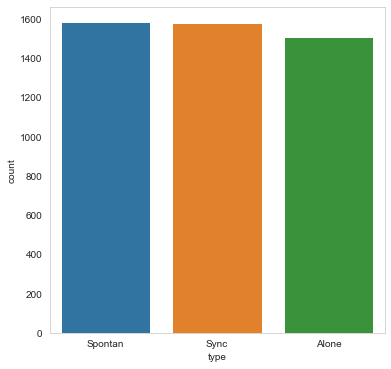

In [70]:
plt.figure(figsize = (6,6))
sns.countplot(x = "type", data = train_df)

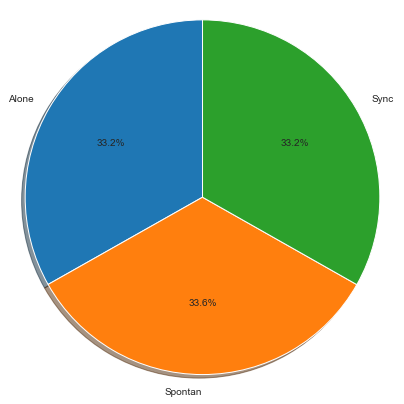

In [71]:
labels = 'Alone','Spontan','Sync'
sizes = [31363, 31771, 31379]

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

Text(0, 0.5, 'X pos left')

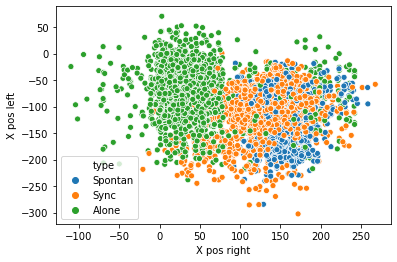

In [40]:
sns.scatterplot(x="r_Position X", y="l_Position X", hue="type", data=train_df)
plt.xlabel('X pos right')
plt.ylabel('X pos left')

Text(0, 0.5, 'Y pos left')

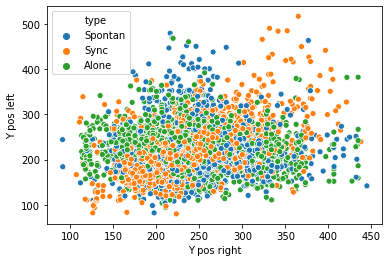

In [41]:
sns.scatterplot(x="r_Position Y", y="l_Position Y", hue="type", data=train_df)
plt.xlabel('Y pos right')
plt.ylabel('Y pos left')

Text(0, 0.5, 'Z pos left')

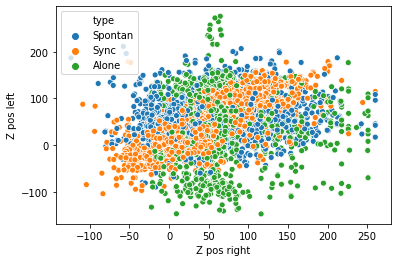

In [42]:
sns.scatterplot(x="r_Position Z", y="l_Position Z", hue="type", data=train_df)
plt.xlabel('Z pos right')
plt.ylabel('Z pos left')

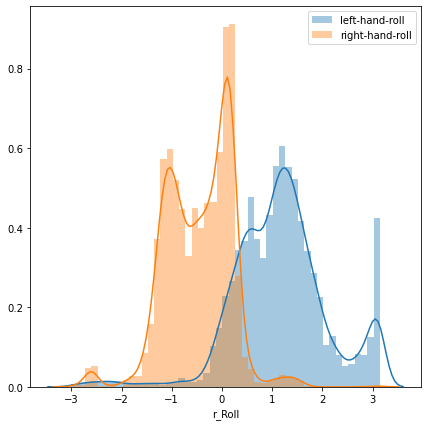

In [43]:
plt.figure(figsize=(7,7))
x = train_df['l_Roll']
y = train_df['r_Roll']
sns.distplot(x)
sns.distplot(y)
plt.legend(labels=['left-hand-roll', 'right-hand-roll'])
plt.show()

Text(0.5, 0, 'Left Position Z')

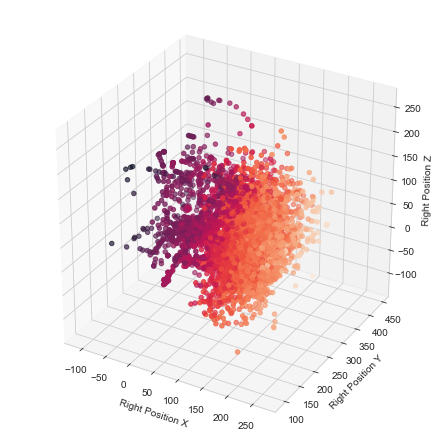

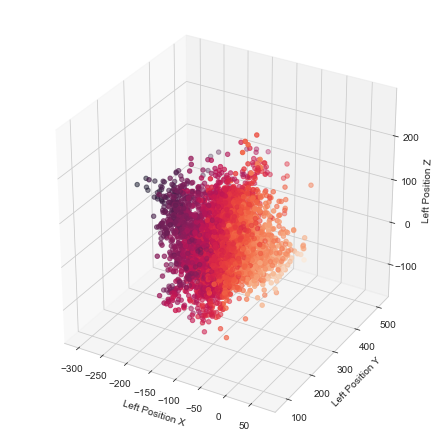

In [44]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig1 = plt.figure(figsize=(6,6))
ax = Axes3D(fig1) 
x1 = train_df['r_Position X']
y1 = train_df['r_Position Y']
z1 = train_df['r_Position Z']
ax.scatter(x1, y1, z1, c=x1, marker='o')
ax.set_xlabel('Right Position X')
ax.set_ylabel('Right Position Y')
ax.set_zlabel('Right Position Z')

fig2 = plt.figure(figsize=(6,6))
ax = Axes3D(fig2) 
x2 = train_df['l_Position X']
y2 = train_df['l_Position Y']
z2 = train_df['l_Position Z']
ax.scatter(x2, y2, z2, c=x2, marker='o')
ax.set_xlabel('Left Position X')
ax.set_ylabel('Left Position Y')
ax.set_zlabel('Left Position Z')

Text(0.5, 0, 'Left Velocity Z')

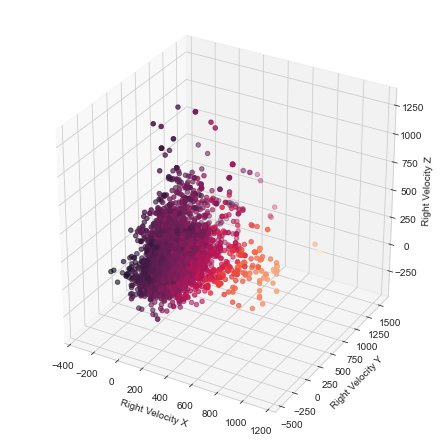

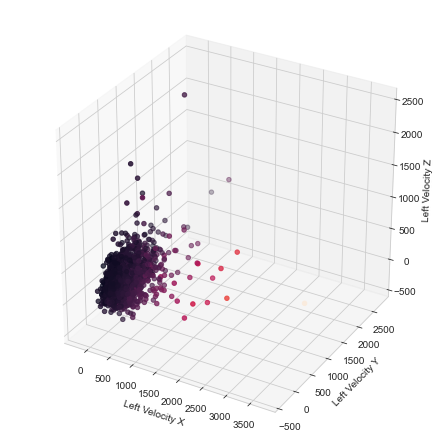

In [45]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig1 = plt.figure(figsize=(6,6))
ax = Axes3D(fig1) 
x1 = train_df['r_Velocity X']
y1 = train_df['r_Velocity Y']
z1 = train_df['r_Velocity Z']
ax.scatter(x1, y1, z1, c=x1, marker='o')
ax.set_xlabel('Right Velocity X')
ax.set_ylabel('Right Velocity Y')
ax.set_zlabel('Right Velocity Z')

fig2 = plt.figure(figsize=(6,6))
ax = Axes3D(fig2) 
x2 = train_df['l_Velocity X']
y2 = train_df['l_Velocity Y']
z2 = train_df['l_Velocity Z']
ax.scatter(x2, y2, z2, c=x2, marker='o')
ax.set_xlabel('Left Velocity X')
ax.set_ylabel('Left Velocity Y')
ax.set_zlabel('Left Velocity Z')

Text(0.5, 0, 'Left Wrist Pos Z')

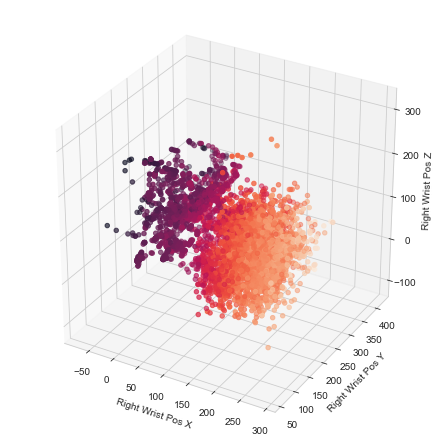

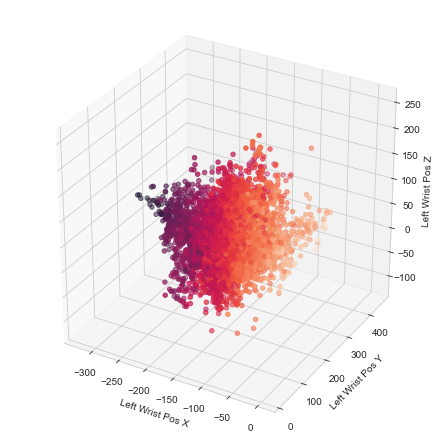

In [46]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig1 = plt.figure(figsize=(6,6))
ax = Axes3D(fig1) 
x1 = train_df['r_Wrist Pos X']
y1 = train_df['r_Wrist Pos Y']
z1 = train_df['r_Wrist Pos Z']
ax.scatter(x1, y1, z1, c=x1, marker='o')
ax.set_xlabel('Right Wrist Pos X')
ax.set_ylabel('Right Wrist Pos Y')
ax.set_zlabel('Right Wrist Pos Z')

fig2 = plt.figure(figsize=(6,6))
ax = Axes3D(fig2) 
x2 = train_df['l_Wrist Pos X']
y2 = train_df['l_Wrist Pos Y']
z2 = train_df['l_Wrist Pos Z']
ax.scatter(x2, y2, z2, c=x2, marker='o')
ax.set_xlabel('Left Wrist Pos X')
ax.set_ylabel('Left Wrist Pos Y')
ax.set_zlabel('Left Wrist Pos Z')

Text(0.5, 0, 'Left Elbow pos Z')

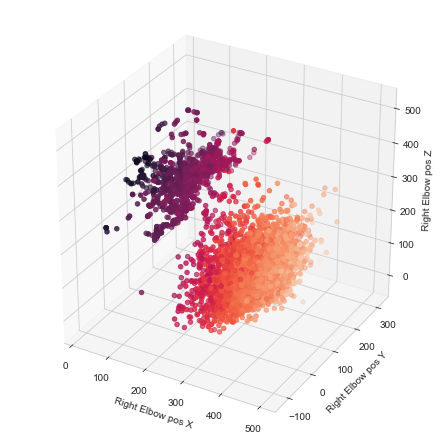

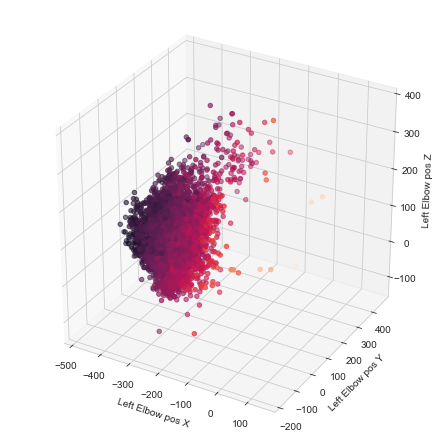

In [47]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig1 = plt.figure(figsize=(6,6))
ax = Axes3D(fig1) 
x1 = train_df['r_Elbow pos X']
y1 = train_df['r_Elbow Pos Y']
z1 = train_df['r_Elbow Pos Z']
ax.scatter(x1, y1, z1, c=x1, marker='o')
ax.set_xlabel('Right Elbow pos X')
ax.set_ylabel('Right Elbow pos Y')
ax.set_zlabel('Right Elbow pos Z')

fig2 = plt.figure(figsize=(6,6))
ax = Axes3D(fig2) 
x2 = train_df['l_Elbow pos X']
y2 = train_df['l_Elbow Pos Y']
z2 = train_df['l_Elbow Pos Z']
ax.scatter(x2, y2, z2, c=x2, marker='o')
ax.set_xlabel('Left Elbow pos X')
ax.set_ylabel('Left Elbow pos Y')
ax.set_zlabel('Left Elbow pos Z')

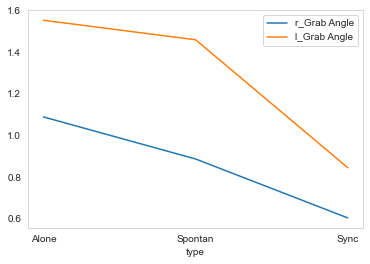

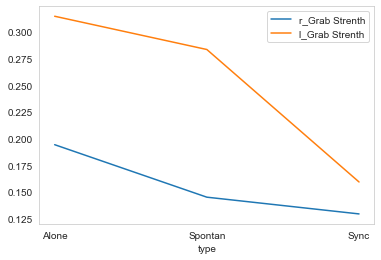

In [49]:
train_df.groupby(['type'])['r_Grab Angle','l_Grab Angle'].mean().plot()
train_df.groupby(['type'])['r_Grab Strenth','l_Grab Strenth'].mean().plot()

In [50]:
type_

,l_Frame ID,l_Hand Type,l_# hands,l_Position X,l_Position Y,l_Position Z,l_Velocity X,l_Velocity Y,l_Velocity Z,l_Pitch,...,r_Wrist Pos X,r_Wrist Pos Y,r_Wrist Pos Z,r_Elbow pos X,r_Elbow Pos Y,r_Elbow Pos Z,r_Grab Strenth,r_Grab Angle,r_Pinch Strength,r_type
type,,,,,,,,,,,,,,,,,,,,,
Alone,31363,31363,31363,31363,31363,31363,31363,31363,31363,31363,...,30369,30369,30369,30369,30369,30369,31363,31363,31363,31363
Spontan,31771,31771,31771,31771,31771,31771,31771,31771,31771,31771,...,31602,31602,31602,31602,31602,31602,31602,31602,31602,31602
Sync,31379,31379,31379,31379,31379,31379,31379,31379,31379,31379,...,31364,31364,31364,31364,31364,31364,31364,31364,31364,31364


# preprocessing of data

In [73]:
# keep aside to the end
test_labels = test_df['type']
X_test = test_df.drop('type', axis =1)

In [74]:
# train the model on this data
train_label = train_df['type']
train_df = train_df.drop('type', axis =1)
X_train, X_valid, y_train, y_valid = train_test_split(train_df, train_label, test_size=0.2, random_state=1)

In [75]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Modeling:

### Dummy model

In [76]:
dc = DummyClassifier(strategy = 'most_frequent')
dc.fit(X_train, y_train)
y_pred = dc.predict(X_valid)
label, count = np.unique(np.array(y_pred), return_counts=True)
print("Accuracy of Dummy Classifier: ",metrics.accuracy_score(y_valid, y_pred)*100)

Accuracy of Dummy Classifier:  33.61884368308351


### KNN 

In [77]:
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_valid)
knn_score = knn.score(X_valid,y_valid)*100

In [78]:
#f-score:
f=f1_score(y_valid, knn_pred,average='weighted')
print('f-score', f)

f-score 0.9219110525703439


In [79]:
# Accuracy:
print("Testing Score: ",knn.score(X_valid,y_valid)*100)
print("Training Score: ",knn.score(X_train, y_train)*100)

Testing Score:  92.18415417558886
Training Score:  92.92793999464239


In [80]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,knn_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         306       1    1
       Spontan         0     286   28
       Sync            0      43  269

              precision    recall  f1-score   support

       Alone       1.00      0.99      1.00       308
     Spontan       0.87      0.91      0.89       314
        Sync       0.90      0.86      0.88       312

    accuracy                           0.92       934
   macro avg       0.92      0.92      0.92       934
weighted avg       0.92      0.92      0.92       934



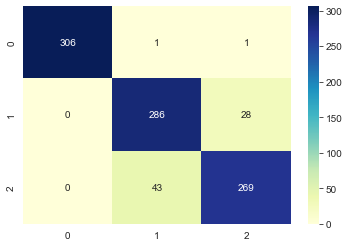

In [81]:
con_mat = confusion_matrix(y_valid, knn_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, knn_pred))

### Logistic Regression

In [113]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_valid)
lr_score = lr.score(X_valid,y_valid)*100

In [114]:
#f-score:
f=f1_score(y_valid, lr_pred,average='weighted')
print('f-score', f)

f-score 0.8928876957635302


In [115]:
#Accuracy:
print("Testing Score: ",lr.score(X_valid,y_valid)*100)
print("Training Score: ",lr.score(X_train, y_train)*100)

Testing Score:  89.29336188436831
Training Score:  88.05250468791857


In [116]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,lr_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         308       0    0
       Spontan         0     270   44
       Sync            0      56  256

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00       308
     Spontan       0.83      0.86      0.84       314
        Sync       0.85      0.82      0.84       312

    accuracy                           0.89       934
   macro avg       0.89      0.89      0.89       934
weighted avg       0.89      0.89      0.89       934



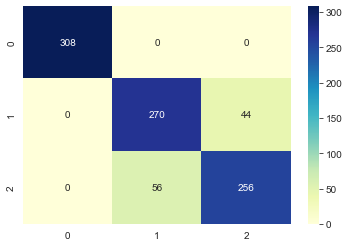

In [117]:
con_mat = confusion_matrix(y_valid, lr_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, lr_pred))

### Gaussian Naive Bayes 

In [87]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_valid)
gnb_score = gnb.score(X_valid,y_valid)*100

In [88]:
#f-score:
f=f1_score(y_valid, gnb_pred,average='weighted')
print('f-score', f)

f-score 0.8699971657276656


In [89]:
#Accuracy:
print("Testing Score: ",gnb.score(X_valid,y_valid)*100)
print("Training Score: ",gnb.score(X_train, y_train)*100)

Testing Score:  87.04496788008565
Training Score:  85.18617733726227


In [90]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,gnb_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         305       0    3
       Spontan         1     274   39
       Sync            1      77  234

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00       308
     Spontan       0.83      0.86      0.84       314
        Sync       0.85      0.82      0.84       312

    accuracy                           0.89       934
   macro avg       0.89      0.89      0.89       934
weighted avg       0.89      0.89      0.89       934



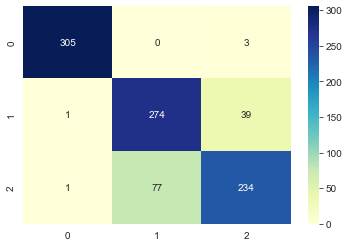

In [91]:
con_mat = confusion_matrix(y_valid, gnb_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, lr_pred))

### Random Forest

In [92]:
rfc = RandomForestClassifier(n_estimators = 200,random_state = 42)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_valid)
rfc_score = rfc.score(X_valid,y_valid)*100

In [93]:
#f-score:
f=f1_score(y_valid, rfc_pred,average='weighted')
print('f-score', f)

f-score 0.9614482321847682


In [94]:
#Accuracy:
print("Testing Score: ",rfc.score(X_valid,y_valid)*100)
print("Training Score: ",rfc.score(X_train, y_train)*100)

Testing Score:  96.1456102783726
Training Score:  100.0


In [95]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,rfc_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         308       0    0
       Spontan         0     300   14
       Sync            0      22  290

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00       308
     Spontan       0.93      0.96      0.94       314
        Sync       0.95      0.93      0.94       312

    accuracy                           0.96       934
   macro avg       0.96      0.96      0.96       934
weighted avg       0.96      0.96      0.96       934



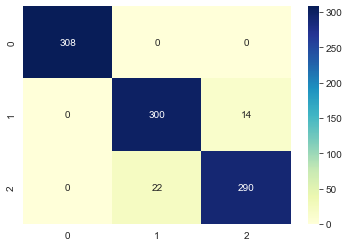

In [96]:
con_mat = confusion_matrix(y_valid, rfc_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, rfc_pred))

# Ensemble Learning

### AdaBoost

In [111]:
n_estimators=[150,200,250,300]
learning_rate=[0.3,0.5,0.7,0.9]
scores = []
for n in n_estimators:
    for lre in learning_rate:
        adab = AdaBoostClassifier(n_estimators=n,learning_rate=lre,random_state=42)
        adab.fit(X_train, y_train)
        y_pred = adab.predict(X_valid)
        score=[n,lre,metrics.accuracy_score(y_valid, y_pred)]
        scores.append(score)
df = pd.DataFrame(scores, columns=['n estimators','learning rate','accuracy'])
df=df.sort_values('accuracy')
df

,n estimators,learning rate,accuracy
13,300,0.5,0.767666
11,250,0.9,0.768737
12,300,0.3,0.773019
1,150,0.5,0.774090
9,250,0.5,0.774090
7,200,0.9,0.778373
8,250,0.3,0.778373
0,150,0.3,0.782655
4,200,0.3,0.784797
5,200,0.5,0.784797


In [98]:
adab = AdaBoostClassifier(n_estimators = 250,learning_rate = 0.7,random_state = 42)
adab.fit(X_train, y_train)
adab_pred = adab.predict(X_valid)
adab_score = adab.score(X_valid,y_valid)*100

In [99]:
#f-score:
f=f1_score(y_valid, adab_pred,average='weighted')
print('f-score', f)

f-score 0.804689842969081


In [100]:
#Accuracy:
print("Testing Score: ",adab.score(X_valid,y_valid)*100)
print("Training Score: ",adab.score(X_train, y_train)*100)

Testing Score:  80.72805139186295
Training Score:  77.31047414947764


In [101]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,adab_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         307       0    1
       Spontan         0     261   53
       Sync            0     126  186

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00       308
     Spontan       0.67      0.83      0.74       314
        Sync       0.78      0.60      0.67       312

    accuracy                           0.81       934
   macro avg       0.82      0.81      0.81       934
weighted avg       0.82      0.81      0.80       934



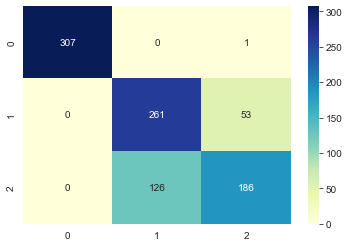

In [102]:
con_mat = confusion_matrix(y_valid, adab_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, adab_pred))

### XGBoost

In [103]:
xgb_c = xgboost.XGBClassifier(n_estimators = 200,n_jobs = -1,learning_rate = 0.7, seed = 0,eval_metric='mlogloss')
xgb_c.fit(X_train, y_train)
xgb_c_pred = xgb_c.predict(X_valid)
xgb_score = xgb_c.score(X_valid,y_valid)*100

In [104]:
#f-score:
f=f1_score(y_valid, xgb_c_pred,average='weighted')
print('f-score', f)

f-score 0.9743024946597967


In [105]:
#Accuracy:
print("Testing Score: ",xgb_c.score(X_valid,y_valid)*100)
print("Training Score: ",xgb_c.score(X_train, y_train)*100)

Testing Score:  97.4304068522484
Training Score:  100.0


In [106]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,xgb_c_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         308       0    0
       Spontan         0     304   10
       Sync            0      14  298

              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00       308
     Spontan       0.96      0.97      0.96       314
        Sync       0.97      0.96      0.96       312

    accuracy                           0.97       934
   macro avg       0.97      0.97      0.97       934
weighted avg       0.97      0.97      0.97       934



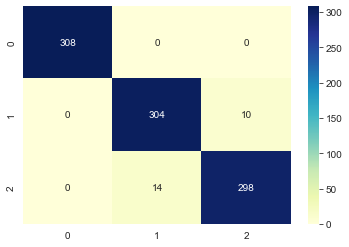

In [107]:
con_mat = confusion_matrix(y_valid, xgb_c_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, xgb_c_pred))

# PCA:

In [125]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)

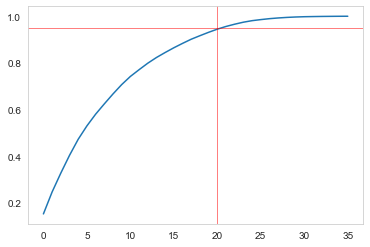

In [126]:
plt.plot(cumsum)
plt.axhline(y = 0.95, linewidth=0.5, color='r');
plt.axvline(x = 20, linewidth=0.5, color='r');

In [127]:
pca = PCA(n_components = 0.95)
X_train_reduced = pca.fit_transform(X_train)
X_valid_reduced = pca.transform(X_valid)

In [128]:
pca.n_components_

22

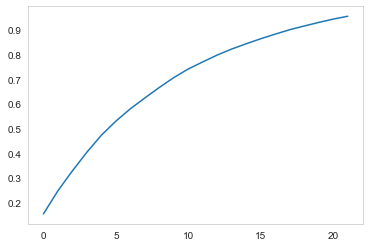

In [129]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [130]:
X_train_PCA = pd.DataFrame(X_train_reduced)
X_valid_PCA = pd.DataFrame(X_valid_reduced)

## Modeling (after PCA):

### KNN 

In [131]:
knnPCA = KNeighborsClassifier(n_neighbors = 20)
knnPCA.fit(X_train_PCA, y_train)
knnPCA_pred = knnPCA.predict(X_valid_PCA)
knnPCA_score = knnPCA.score(X_valid_PCA,y_valid)*100

In [132]:
#f-score:
f=f1_score(y_valid, knnPCA_pred,average='weighted')
print('f-score', f)

f-score 0.9229886902025073


In [133]:
#Accuracy:
print("Testing Score: ",knnPCA.score(X_valid_PCA,y_valid)*100)
print("Training Score: ",knnPCA.score(X_train_PCA, y_train)*100)

Testing Score:  92.29122055674517
Training Score:  92.60648272167158


In [134]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,knnPCA_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         304       1    3
       Spontan         0     292   22
       Sync            0      46  266

              precision    recall  f1-score   support

       Alone       1.00      0.99      0.99       308
     Spontan       0.86      0.93      0.89       314
        Sync       0.91      0.85      0.88       312

    accuracy                           0.92       934
   macro avg       0.93      0.92      0.92       934
weighted avg       0.92      0.92      0.92       934



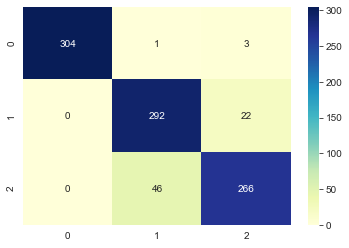

In [135]:
con_mat = confusion_matrix(y_valid, knnPCA_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, knnPCA_pred))

### Random Forest

In [136]:
rfcPCA = RandomForestClassifier(n_estimators = 200,random_state = 42)
rfcPCA.fit(X_train_PCA,y_train)
rfcPCA_pred = rfcPCA.predict(X_valid_PCA)
rfcPCA_score = rfcPCA.score(X_valid_PCA,y_valid)*100

In [137]:
#f-score:
f=f1_score(y_valid, rfcPCA_pred,average='weighted')
print('f-score', f)

f-score 0.9166455036480895


In [138]:
#Accuracy:
print("Testing Score: ",rfcPCA.score(X_valid_PCA,y_valid)*100)
print("Training Score: ",rfcPCA.score(X_train_PCA, y_train)*100)

Testing Score:  91.64882226980728
Training Score:  100.0


In [139]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,rfcPCA_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         302       3    3
       Spontan         3     284   27
       Sync            0      42  270

              precision    recall  f1-score   support

       Alone       0.99      0.98      0.99       308
     Spontan       0.86      0.90      0.88       314
        Sync       0.90      0.87      0.88       312

    accuracy                           0.92       934
   macro avg       0.92      0.92      0.92       934
weighted avg       0.92      0.92      0.92       934



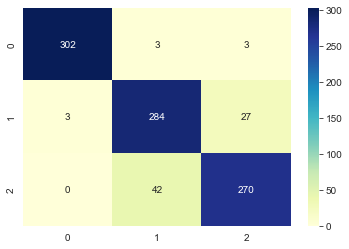

In [140]:
con_mat = confusion_matrix(y_valid, rfcPCA_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, rfcPCA_pred))

# Ensemble Learning

### AdaBoost

In [141]:
adabPCA = AdaBoostClassifier(n_estimators = 250,learning_rate = 0.7,random_state = 42)
adabPCA.fit(X_train_PCA, y_train)
adabPCA_pred = adabPCA.predict(X_valid_PCA)
adabPCA_score = adabPCA.score(X_valid_PCA,y_valid)*100

In [142]:
#f-score:
f=f1_score(y_valid, adabPCA_pred,average='weighted')
print('f-score', f)

f-score 0.745906083146285


In [143]:
#Accuracy:
print("Testing Score: ",adabPCA.score(X_valid_PCA,y_valid)*100)
print("Training Score: ",adabPCA.score(X_train_PCA, y_train)*100)

Testing Score:  74.51820128479658
Training Score:  75.08706134476293


In [144]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,adabPCA_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         303       2    3
       Spontan         0     207  107
       Sync            0     126  186

              precision    recall  f1-score   support

       Alone       1.00      0.98      0.99       308
     Spontan       0.62      0.66      0.64       314
        Sync       0.63      0.60      0.61       312

    accuracy                           0.75       934
   macro avg       0.75      0.75      0.75       934
weighted avg       0.75      0.75      0.75       934



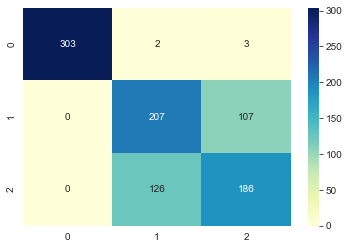

In [145]:
con_mat = confusion_matrix(y_valid, adabPCA_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, adabPCA_pred))

### XGBoost

In [146]:
xgb_PCA = xgboost.XGBClassifier(n_estimators = 200,n_jobs = -1,learning_rate = 0.7, seed = 0,eval_metric='mlogloss')
xgb_PCA.fit(X_train_PCA, y_train)
xgb_PCA_pred = xgb_PCA.predict(X_valid_PCA)
xgb_PCA_score = xgb_PCA.score(X_valid_PCA,y_valid)*100

In [147]:
#f-score:
f=f1_score(y_valid, xgb_PCA_pred,average='weighted')
print('f-score', f)

f-score 0.9369161508373007


In [148]:
#Accuracy:
print("Testing Score: ",xgb_PCA.score(X_valid_PCA,y_valid)*100)
print("Training Score: ",xgb_PCA.score(X_train_PCA, y_train)*100)

Testing Score:  93.6830835117773
Training Score:  100.0


In [149]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,xgb_PCA_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         304       1    3
       Spontan         2     286   26
       Sync            0      27  285

              precision    recall  f1-score   support

       Alone       0.99      0.99      0.99       308
     Spontan       0.91      0.91      0.91       314
        Sync       0.91      0.91      0.91       312

    accuracy                           0.94       934
   macro avg       0.94      0.94      0.94       934
weighted avg       0.94      0.94      0.94       934



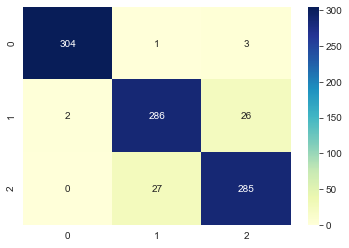

In [150]:
con_mat = confusion_matrix(y_valid, xgb_PCA_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, xgb_PCA_pred))

### Stacking Ensemble

In [151]:
estimators = [('adaBoost', adabPCA), ('knn', knnPCA), ('xgboost', xgb_PCA)]
stack_clf = StackingClassifier(estimators = estimators, final_estimator = xgb_PCA)
stack_clf.fit(X_train_PCA, y_train)
stack_clf_pred = stack_clf.predict(X_valid_PCA)
stack_clf_score = stack_clf.score(X_valid_PCA,y_valid)*100

In [152]:
#f-score:
f=f1_score(y_valid, stack_clf_pred,average='weighted')
print('f-score', f)

f-score 0.9423108977117373


In [153]:
#Accuracy:
print("Testing Score: ",stack_clf.score(X_valid_PCA,y_valid)*100)
print("Training Score: ",stack_clf.score(X_train_PCA, y_train)*100)

Testing Score:  94.21841541755889
Training Score:  99.30350924189659


In [154]:
#Confusion matrix:
df = pd.DataFrame(
    metrics.confusion_matrix(y_valid,stack_clf_pred),
    index = [['actual', 'actual','actual'], ['Alone', 'Spontan' ,'Sync']],
    columns = [['predicted', 'predicted','predicted'], ['Alone' ,'Spontan', 'Sync']])
df

predicted             
                   Alone Spontan Sync
actual Alone         305       2    1
       Spontan         0     290   24
       Sync            0      27  285

              precision    recall  f1-score   support

       Alone       1.00      0.99      1.00       308
     Spontan       0.91      0.92      0.92       314
        Sync       0.92      0.91      0.92       312

    accuracy                           0.94       934
   macro avg       0.94      0.94      0.94       934
weighted avg       0.94      0.94      0.94       934



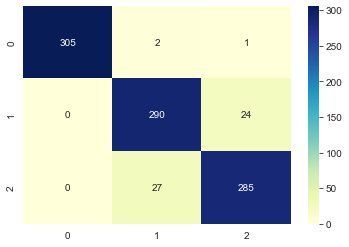

In [155]:
con_mat = confusion_matrix(y_valid, stack_clf_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='g',cmap="YlGnBu")
print(classification_report(y_valid, stack_clf_pred))

### Voting Classifier

In [156]:
classifiers = [('KNN', knn),             
               ('Random Forest', rfc)]

In [157]:
for c_name, c in classifiers:
    c.fit(X_train_PCA, y_train)
    preds = c.predict(X_valid_PCA)
    print(f'{c_name} accuracy: {accuracy_score(y_valid, preds)*100}')

KNN accuracy: 92.29122055674517
Random Forest accuracy: 91.64882226980728


In [158]:
soft_VC = VotingClassifier(estimators=classifiers, voting='soft')
soft_VC.fit(X_train_PCA, y_train)
soft_pred = soft_VC.predict(X_valid_PCA)

In [159]:
soft_vc = accuracy_score(y_valid, soft_pred)*100
print(f'Soft Voting Classifier score: {soft_vc}')

Soft Voting Classifier score: 93.25481798715204


In [160]:
hard_VC = VotingClassifier(estimators=classifiers, voting='hard')
hard_VC.fit(X_train_PCA, y_train)
hard_pred = hard_VC.predict(X_valid_PCA)

In [161]:
hard_vc = accuracy_score(y_valid, hard_pred)*100
print(f'Hard Voting Classifier score: {hard_vc}')

Hard Voting Classifier score: 91.86295503211991


# results:

In [108]:
score_list = [knn_score,lr_score,gnb_score,rfc_score,adab_score,xgb_score]
score_df = pd.DataFrame(score_list, index = ['knn','logistic regression','Gaussian Naive Bayes','Random Forest','AdaBoost','XGBoost'], columns = ['score - before PCA'])
score_df

,score - before PCA
knn,92.184154
logistic regression,89.293362
Gaussian Naive Bayes,87.044968
Random Forest,96.145610
AdaBoost,80.728051
XGBoost,97.430407


In [162]:
score_list_PCA = [knnPCA_score,rfcPCA_score,adabPCA_score,xgb_PCA_score,stack_clf_score,soft_vc,hard_vc]
score_PCA_df = pd.DataFrame(score_list_PCA, index = ['knn', 'Random Forest','ada boost','xgboost','Stacking','Soft Voting','Hard Voting'], columns = ['score'])
score_PCA_df

,score
knn,92.291221
Random Forest,91.648822
ada boost,74.518201
xgboost,93.683084
Stacking,94.218415
Soft Voting,93.254818
Hard Voting,91.862955


In [163]:
X_test_reduced = pca.transform(X_test)

<B> before PCA:

In [109]:
# knn
knn_pred = knn.predict(X_test)
final_knn = accuracy_score(test_labels, knn_pred)*100
print(f'knn score: {final_knn}')
print(classification_report(test_labels, knn_pred))

knn score: 89.00445765230312
              precision    recall  f1-score   support

       Alone       1.00      0.99      0.99       441
     Spontan       0.80      0.90      0.85       457
        Sync       0.89      0.78      0.83       448

    accuracy                           0.89      1346
   macro avg       0.90      0.89      0.89      1346
weighted avg       0.89      0.89      0.89      1346



In [118]:
# logistic regression
lr_pred = lr.predict(X_test)
final_lr = accuracy_score(test_labels, lr_pred)*100
print(f'logistic regression score: {final_lr}')
print(classification_report(test_labels, lr_pred))

logistic regression score: 86.55274888558692
              precision    recall  f1-score   support

       Alone       1.00      0.99      0.99       441
     Spontan       0.72      0.98      0.83       457
        Sync       0.96      0.63      0.76       448

    accuracy                           0.87      1346
   macro avg       0.90      0.87      0.86      1346
weighted avg       0.89      0.87      0.86      1346



In [119]:
# Gaussian Naive Bayes
gnb_pred = gnb.predict(X_test)
final_gnb = accuracy_score(test_labels, gnb_pred)*100
print(f'gaussian naive bayes score: {final_gnb}')
print(classification_report(test_labels, gnb_pred))

gaussian naive bayes score: 87.89004457652302
              precision    recall  f1-score   support

       Alone       0.99      1.00      0.99       441
     Spontan       0.77      0.92      0.84       457
        Sync       0.90      0.72      0.80       448

    accuracy                           0.88      1346
   macro avg       0.89      0.88      0.88      1346
weighted avg       0.89      0.88      0.88      1346



In [120]:
# Random Forest
rfc_pred = rfc.predict(X_test)
final_rfc = metrics.accuracy_score(test_labels, rfc_pred)*100
print(f'Random Forest score: {final_rfc}')
print(classification_report(test_labels, rfc_pred))

Random Forest score: 89.15304606240714
              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00       441
     Spontan       0.77      0.97      0.86       457
        Sync       0.96      0.70      0.81       448

    accuracy                           0.89      1346
   macro avg       0.91      0.89      0.89      1346
weighted avg       0.91      0.89      0.89      1346



In [121]:
# AdaBoost
adab_pred  = adab.predict(X_test)
final_adab =  metrics.accuracy_score(test_labels, adab_pred)*100
print(f'ada boost score: {final_adab}')
print(classification_report(test_labels, adab_pred))

ada boost score: 73.55126300148589
              precision    recall  f1-score   support

       Alone       0.99      0.99      0.99       441
     Spontan       0.61      0.68      0.64       457
        Sync       0.62      0.53      0.57       448

    accuracy                           0.74      1346
   macro avg       0.74      0.74      0.74      1346
weighted avg       0.74      0.74      0.73      1346



In [123]:
# XGBoost
xgb_c_pred = xgb_c.predict(X_test)
final_xgb = accuracy_score(test_labels, xgb_c_pred)*100
print(f'XGBoost score: {final_xgb}')
print(classification_report(test_labels, xgb_c_pred))

XGBoost score: 89.45022288261517
              precision    recall  f1-score   support

       Alone       1.00      1.00      1.00       441
     Spontan       0.78      0.97      0.86       457
        Sync       0.96      0.71      0.82       448

    accuracy                           0.89      1346
   macro avg       0.91      0.89      0.89      1346
weighted avg       0.91      0.89      0.89      1346



<B> after PCA:

In [164]:
# knn
knnPCA_pred = knnPCA.predict(X_test_reduced)
final_knnPCA = accuracy_score(test_labels, knnPCA_pred)*100
print(f'knn score: {final_knnPCA}')
print(classification_report(test_labels, knnPCA_pred))

knn score: 88.41010401188707
              precision    recall  f1-score   support

       Alone       1.00      0.98      0.99       441
     Spontan       0.79      0.91      0.84       457
        Sync       0.89      0.76      0.82       448

    accuracy                           0.88      1346
   macro avg       0.89      0.88      0.88      1346
weighted avg       0.89      0.88      0.88      1346



In [165]:
# Random Forest
rfcPCA_pred = rfcPCA.predict(X_test_reduced)
final_rfcPCA = metrics.accuracy_score(test_labels, rfcPCA_pred)*100
print(f'Random Forest score: {final_rfcPCA}')
print(classification_report(test_labels, rfcPCA_pred))

Random Forest score: 87.592867756315
              precision    recall  f1-score   support

       Alone       1.00      0.98      0.99       441
     Spontan       0.75      0.96      0.84       457
        Sync       0.94      0.69      0.79       448

    accuracy                           0.88      1346
   macro avg       0.90      0.88      0.87      1346
weighted avg       0.89      0.88      0.87      1346



In [166]:
# AdaBoost
adabPCA_pred = adabPCA.predict(X_test_reduced)
final_adabPCA =  metrics.accuracy_score(test_labels, adabPCA_pred)*100
print(f'ada boost score: {final_adabPCA}')
print(classification_report(test_labels, adabPCA_pred))

ada boost score: 78.97473997028231
              precision    recall  f1-score   support

       Alone       1.00      0.99      0.99       441
     Spontan       0.67      0.78      0.72       457
        Sync       0.72      0.61      0.66       448

    accuracy                           0.79      1346
   macro avg       0.80      0.79      0.79      1346
weighted avg       0.79      0.79      0.79      1346



In [167]:
# XGBoost
xgb_PCA_pred = xgb_PCA.predict(X_test_reduced)
final_xgb_PCA = metrics.accuracy_score(test_labels, xgb_PCA_pred)*100
print(f'XGBoost score: {final_xgb_PCA}')
print(classification_report(test_labels, xgb_PCA_pred))

XGBoost score: 87.96433878157504
              precision    recall  f1-score   support

       Alone       0.99      0.99      0.99       441
     Spontan       0.76      0.94      0.84       457
        Sync       0.93      0.71      0.80       448

    accuracy                           0.88      1346
   macro avg       0.89      0.88      0.88      1346
weighted avg       0.89      0.88      0.88      1346



In [168]:
# Stacking
stack_clf_pred = stack_clf.predict(X_test_reduced)
final_stack_clf = metrics.accuracy_score(test_labels, stack_clf_pred)*100
print(f'Stacking score: {final_stack_clf}')
print(classification_report(test_labels, stack_clf_pred))

Stacking score: 87.29569093610698
              precision    recall  f1-score   support

       Alone       1.00      0.99      0.99       441
     Spontan       0.77      0.89      0.83       457
        Sync       0.87      0.74      0.80       448

    accuracy                           0.87      1346
   macro avg       0.88      0.87      0.87      1346
weighted avg       0.88      0.87      0.87      1346



In [169]:
# Soft Voting
soft_pred = soft_VC.predict(X_test_reduced)
final_soft_VC = metrics.accuracy_score(test_labels, soft_pred)*100
print(f'Soft Voting score: {final_soft_VC}')
print(classification_report(test_labels, soft_pred))

Soft Voting score: 88.7072808320951
              precision    recall  f1-score   support

       Alone       1.00      0.99      0.99       441
     Spontan       0.78      0.93      0.85       457
        Sync       0.91      0.75      0.82       448

    accuracy                           0.89      1346
   macro avg       0.90      0.89      0.89      1346
weighted avg       0.90      0.89      0.89      1346



In [170]:
# Hard Voting
hard_pred = hard_VC.predict(X_test_reduced)
final_hard_VC = metrics.accuracy_score(test_labels, hard_pred)*100
print(f'Hard Voting score: {final_hard_VC}')
print(classification_report(test_labels, hard_pred))

Hard Voting score: 86.77563150074295
              precision    recall  f1-score   support

       Alone       0.99      0.99      0.99       441
     Spontan       0.73      0.97      0.83       457
        Sync       0.96      0.64      0.77       448

    accuracy                           0.87      1346
   macro avg       0.90      0.87      0.87      1346
weighted avg       0.89      0.87      0.86      1346



# In conclusion:

In [173]:
scores = [final_knn,final_lr,final_gnb,final_rfc,final_adab,final_xgb,final_knnPCA,final_rfcPCA,final_adabPCA,final_xgb_PCA,final_stack_clf,final_soft_VC,final_hard_VC]
score_df = pd.DataFrame(scores, index = ['knn','logistic regression','Gaussian Naive Bayes','Random Forest','AdaBoost','XGBoost','knn PCA','Random Forest PCA','AdaBoost PCA','XGBoost PCA','Stacking PCA','soft voting PCA', 'hard voting PCA'], columns = ['score - before PCA'])
score_df

,score - before PCA
knn,89.004458
logistic regression,86.552749
Gaussian Naive Bayes,87.890045
Random Forest,89.153046
AdaBoost,73.551263
XGBoost,89.450223
knn PCA,88.410104
Random Forest PCA,87.592868
AdaBoost PCA,78.974740
XGBoost PCA,87.964339


# As we can see before the PCA we got a 89.45% accuracy with the XGBoost model, but because we want the most compact model we used PCA and got 88.7% accuracy with the soft voting model. We reduced the dimensions by more than half and got only 0.7% decreace! 